In [1]:
import numpy as np
import PIL.Image
import torch

import dnnlib
import legacy
from wrapper import Generator

In [2]:
import os
os.chdir('..')

In [3]:
device = torch.device('cuda:0')
ckpt = 'pretrained/ffhq256.pkl'
G = Generator(ckpt, device)

In [4]:
seed = 1

In [5]:
z = torch.from_numpy(np.random.RandomState(seed).randn(1, G.G.z_dim)).to(device)
z.shape

torch.Size([1, 512])

In [6]:
#ws = G.mapping(z, truncation_psi=0.7, truncation_cutoff=8)
ws = G.mapping(z, truncation_psi=0.7)#, truncation_cutoff=8)

Setting up PyTorch plugin "bias_act_plugin"... Done.


In [7]:
synth_img = G.synthesis(ws)
synth_img = (synth_img.cpu().permute(0,2,3,1)*127.5+128).clamp(0,255).to(torch.uint8).numpy()

Setting up PyTorch plugin "upfirdn2d_plugin"... Done.


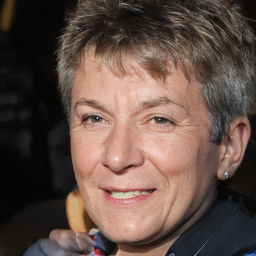

In [8]:
PIL.Image.fromarray(synth_img[0]).resize((256,256))